# Lab Four: The Multi-Layer Perceptron

### Maria Harrison, Garrett Webb, Jackson Heck

## 1. Load, Split, and Balance

(1) Load the data into memory and save it to a pandas data frame. Do not normalize or one-hot encode any of the features until asked to do so later in the rubric. (2) Remove any observations that having missing data. (3) Encode any string data as integers for now. (4) You have the option of keeping the "county" variable or removing it. Be sure to discuss why you decided to keep/remove this variable. 

In [184]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/marycateharrison/Library/Mobile Documents/com~apple~CloudDocs/SMU/spring-2023/machine-learning/acs2017_census_tract_data.csv')

df.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCapErr   73256 non-null  float6

In [186]:
df.isnull()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73999,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [187]:
## find rows that have any missing data
null_df = df[df.isnull().any(axis=1)]

In [188]:
## visualize info of missing data
null_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283 entries, 43 to 73989
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           1283 non-null   int64  
 1   State             1283 non-null   object 
 2   County            1283 non-null   object 
 3   TotalPop          1283 non-null   int64  
 4   Men               1283 non-null   int64  
 5   Women             1283 non-null   int64  
 6   Hispanic          587 non-null    float64
 7   White             587 non-null    float64
 8   Black             587 non-null    float64
 9   Native            587 non-null    float64
 10  Asian             587 non-null    float64
 11  Pacific           587 non-null    float64
 12  VotingAgeCitizen  1283 non-null   int64  
 13  Income            167 non-null    float64
 14  IncomeErr         167 non-null    float64
 15  IncomePerCap      538 non-null    float64
 16  IncomePerCapErr   538 non-null    float6

In [189]:
## visualize the individual id numbers that have missing data
# null_df['TractId'].unique()

In [190]:
null_df[null_df['TractId']==1003990000]

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
43,1003990000,Alabama,Baldwin County,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [191]:
null_df[null_df['TractId']==6037980026]

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
7069,6037980026,California,Los Angeles County,39,32,7,46.2,25.6,17.9,0.0,...,0.0,0.0,33.3,NaN,12,100.0,0.0,0.0,0.0,0.0


In [192]:
null_df[null_df['TractId']==24005980100]

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
30149,24005980100,Maryland,Baltimore County,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [193]:
null_rows = null_df['TractId'].unique()

In [194]:
## remove all rows that have missing data
for n in null_rows:
    df.drop(df[df['TractId'] == n].index, inplace=True)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72718 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           72718 non-null  int64  
 1   State             72718 non-null  object 
 2   County            72718 non-null  object 
 3   TotalPop          72718 non-null  int64  
 4   Men               72718 non-null  int64  
 5   Women             72718 non-null  int64  
 6   Hispanic          72718 non-null  float64
 7   White             72718 non-null  float64
 8   Black             72718 non-null  float64
 9   Native            72718 non-null  float64
 10  Asian             72718 non-null  float64
 11  Pacific           72718 non-null  float64
 12  VotingAgeCitizen  72718 non-null  int64  
 13  Income            72718 non-null  float64
 14  IncomeErr         72718 non-null  float64
 15  IncomePerCap      72718 non-null  float64
 16  IncomePerCapErr   72718 non-null  float6

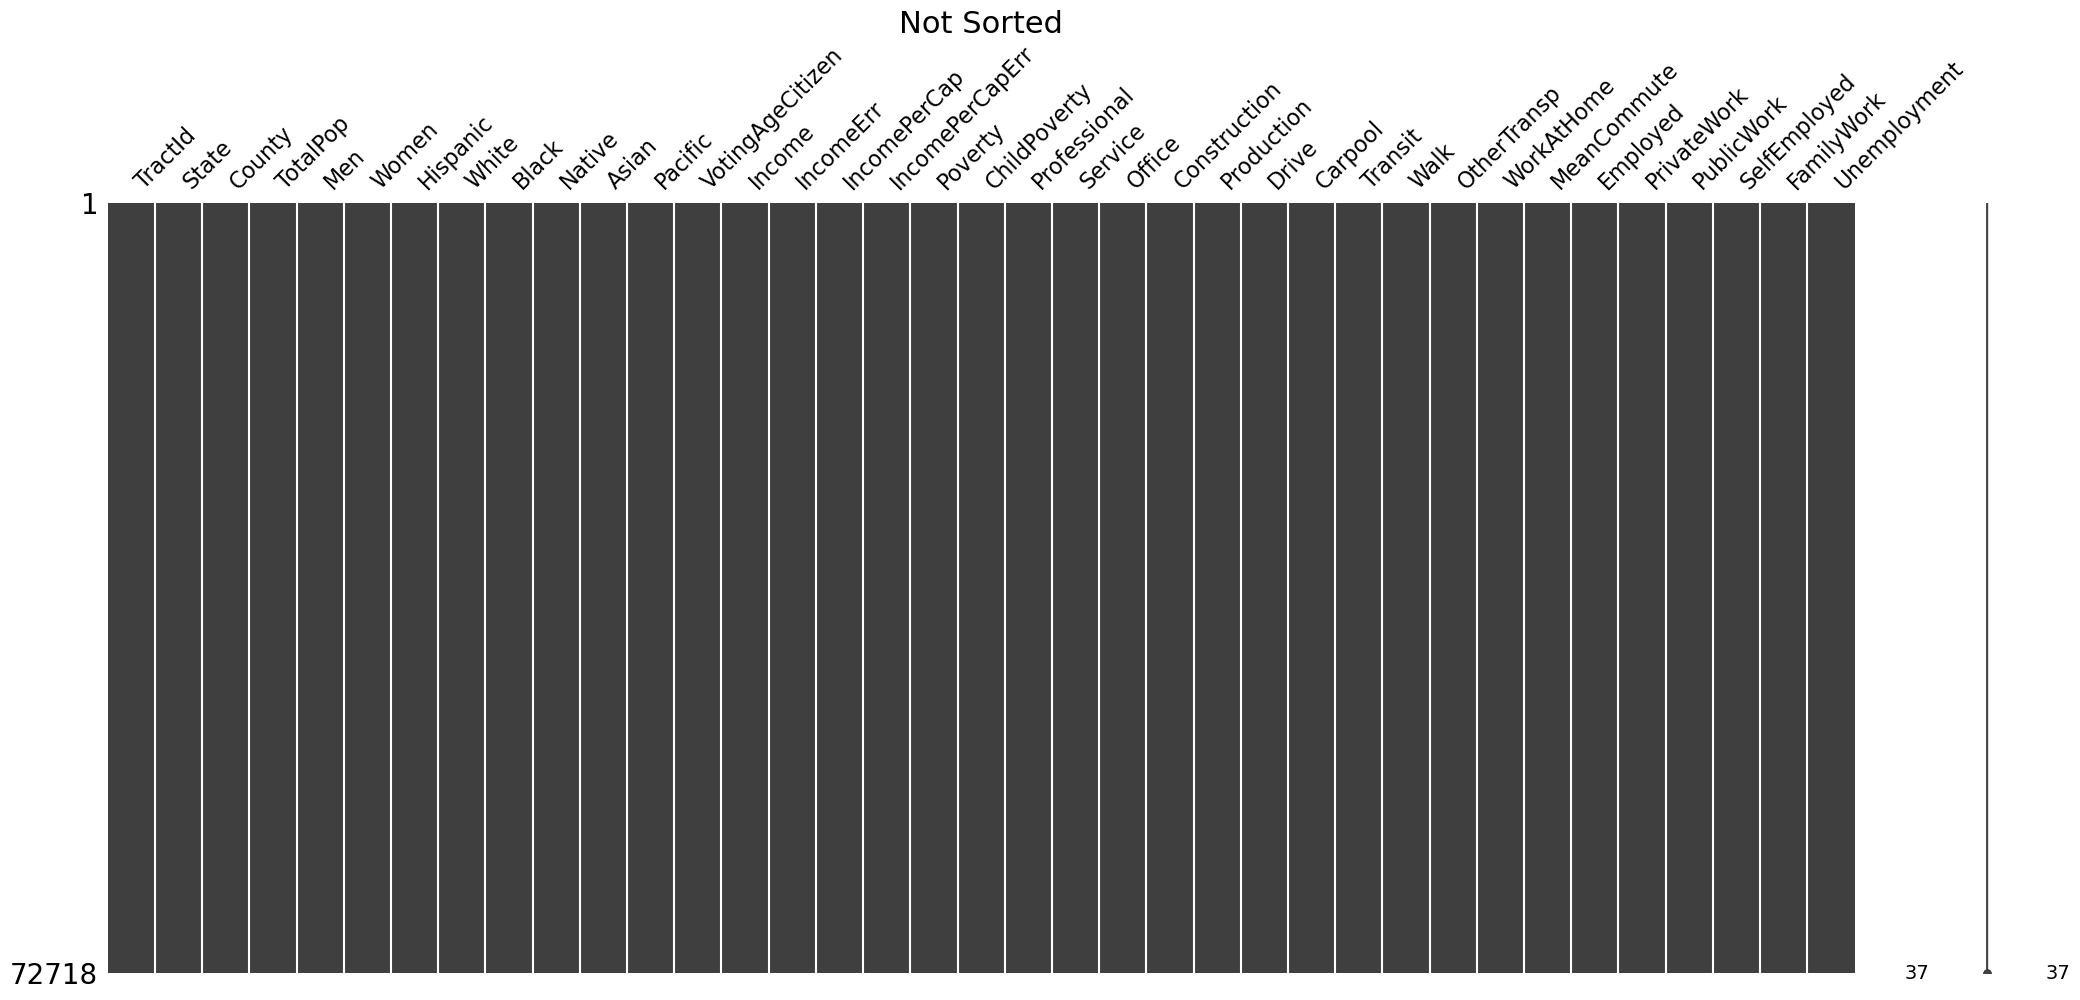

In [196]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

# External package: conda install missingno 
import missingno as mn

mn.matrix(df)
plt.title("Not Sorted",fontsize=22)
plt.show()

In [197]:
## encode any string data as integers

## state and county are the string data

## get unique values

print(df.State.unique())
print(df.County.unique())
state_strings = df.State.unique()
county_strings = df.County.unique()

state_ints = []
county_ints = []

i = 0
for state in state_strings:
    state_ints.append(i)
    i+=1

i = 0
for county in county_strings:
    county_ints.append(i)
    i+=1


['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Puerto Rico']
['Autauga County' 'Baldwin County' 'Barbour County' ...
 'Villalba Municipio' 'Yabucoa Municipio' 'Yauco Municipio']


In [198]:
print(state_ints)
print(county_ints)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 

In [199]:
df.State.replace(to_replace=state_strings,
               value=state_ints,
               inplace=True)
df.County.replace(to_replace=county_strings,
               value=county_ints,
               inplace=True)

In [200]:
print(df.State.unique())
print(df.County.unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51]
[   0    1    2 ... 1951 1952 1953]


In [201]:
## type changed to int64
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72718 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           72718 non-null  int64  
 1   State             72718 non-null  int64  
 2   County            72718 non-null  int64  
 3   TotalPop          72718 non-null  int64  
 4   Men               72718 non-null  int64  
 5   Women             72718 non-null  int64  
 6   Hispanic          72718 non-null  float64
 7   White             72718 non-null  float64
 8   Black             72718 non-null  float64
 9   Native            72718 non-null  float64
 10  Asian             72718 non-null  float64
 11  Pacific           72718 non-null  float64
 12  VotingAgeCitizen  72718 non-null  int64  
 13  Income            72718 non-null  float64
 14  IncomeErr         72718 non-null  float64
 15  IncomePerCap      72718 non-null  float64
 16  IncomePerCapErr   72718 non-null  float6

You have the option of keeping the "county" variable or removing it. Be sure to discuss why you decided to keep/remove this variable.

Balance the dataset so that about the same number of instances are within each class. Choose a method for balancing the dataset and explain your reasoning for selecting this method. One option is to choose quantization thresholds for the "ChildPoverty" variable that equally divide the data into four classes. Should balancing of the dataset be done for both the training and testing set? Explain.

Assume you are equally interested in the classification performance for each class in the dataset. Split the dataset into 80% for training and 20% for testing. There is NO NEED to split the data multiple times for this lab.

In [202]:
print(len(df.ChildPoverty.unique()))
print(df['ChildPoverty'].max())
print(df['ChildPoverty'].min())


954
100.0
0.0


In [203]:
df.sort_values(by=['ChildPoverty'], inplace=True)
df.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
45399,36059408000,32,322,5991,2972,3019,8.6,76.6,2.3,0.0,...,0.5,1.1,2.0,32.7,3186,76.7,18.5,4.3,0.5,7.5
4096,6013343003,4,174,3873,1875,1998,5.0,79.4,0.2,0.5,...,0.2,4.1,12.2,31.8,2018,79.9,8.4,11.7,0.0,5.5
50126,37183053509,33,1268,5397,2878,2519,7.9,79.0,3.0,0.4,...,3.7,1.3,8.3,21.6,2811,79.3,14.2,6.4,0.0,2.5
71358,54065971000,48,51,4934,2480,2454,4.0,94.8,0.7,0.5,...,1.2,1.3,2.4,29.1,1991,77.9,14.0,8.1,0.0,11.5
4093,6013341000,4,174,5446,2650,2796,7.1,73.8,1.4,0.0,...,1.2,2.1,7.0,34.6,2905,76.6,12.5,10.4,0.6,5.3


In [204]:
instances = np.bincount(df['ChildPoverty'])
print(df.ChildPoverty.unique())
print(len(df.ChildPoverty.unique()))
print(instances)
print(len(instances))

[  0.    0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.1
   1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9   2.    2.1   2.2   2.3
   2.4   2.5   2.6   2.7   2.8   2.9   3.    3.1   3.2   3.3   3.4   3.5
   3.6   3.7   3.8   3.9   4.    4.1   4.2   4.3   4.4   4.5   4.6   4.7
   4.8   4.9   5.    5.1   5.2   5.3   5.4   5.5   5.6   5.7   5.8   5.9
   6.    6.1   6.2   6.3   6.4   6.5   6.6   6.7   6.8   6.9   7.    7.1
   7.2   7.3   7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2   8.3
   8.4   8.5   8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3   9.4   9.5
   9.6   9.7   9.8   9.9  10.   10.1  10.2  10.3  10.4  10.5  10.6  10.7
  10.8  10.9  11.   11.1  11.2  11.3  11.4  11.5  11.6  11.7  11.8  11.9
  12.   12.1  12.2  12.3  12.4  12.5  12.6  12.7  12.8  12.9  13.   13.1
  13.2  13.3  13.4  13.5  13.6  13.7  13.8  13.9  14.   14.1  14.2  14.3
  14.4  14.5  14.6  14.7  14.8  14.9  15.   15.1  15.2  15.3  15.4  15.5
  15.6  15.7  15.8  15.9  16.   16.1  16.2  16.3  1

In [205]:
## since there are 72718 instances, each class should have about 18179 instances

df['ChildPoverty'] = pd.cut(df['ChildPoverty'], bins=[-1,6,15,31,101], labels=[0,1,2,3])

In [206]:
df.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
45399,36059408000,32,322,5991,2972,3019,8.6,76.6,2.3,0.0,...,0.5,1.1,2.0,32.7,3186,76.7,18.5,4.3,0.5,7.5
4096,6013343003,4,174,3873,1875,1998,5.0,79.4,0.2,0.5,...,0.2,4.1,12.2,31.8,2018,79.9,8.4,11.7,0.0,5.5
50126,37183053509,33,1268,5397,2878,2519,7.9,79.0,3.0,0.4,...,3.7,1.3,8.3,21.6,2811,79.3,14.2,6.4,0.0,2.5
71358,54065971000,48,51,4934,2480,2454,4.0,94.8,0.7,0.5,...,1.2,1.3,2.4,29.1,1991,77.9,14.0,8.1,0.0,11.5
4093,6013341000,4,174,5446,2650,2796,7.1,73.8,1.4,0.0,...,1.2,2.1,7.0,34.6,2905,76.6,12.5,10.4,0.6,5.3


In [207]:
print(df.ChildPoverty.unique())
print(len(df.ChildPoverty.unique()))
instances = np.bincount(df['ChildPoverty'])
print(instances)
print(len(instances))

[0, 1, 2, 3]
Categories (4, int64): [0 < 1 < 2 < 3]
4
[15583 21887 16512 18736]
4


Note: You will need to one hot encode the target, but do not one hot encode the categorical data until instructed to do so in the lab. 

## 2. Pre-Processing and Initial Modeling

You will be using a two layer perceptron from class for the next few parts of the rubric. There are several versions of the two layer perceptron covered in class, with example code. When selecting an example two layer network from class be sure that you use: (1) vectorized gradient computation, (2) mini-batching, (3) cross entropy loss, and (4) proper Glorot initialization, at a minimum. There is no need to use momentum or learning rate reduction (assuming you choose a sufficiently small learning rate). It is recommended to use sigmoids throughout the network, but not required.

Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Do not normalize or one-hot encode the data (not yet). Be sure that training converges by graphing the loss function versus the number of epochs. 

Now (1) normalize the continuous numeric feature data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs.  

Now(1) normalize the continuous numeric feature data AND (2) one hot encode the categorical data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs. 

Compare the performance of the three models you just trained. Are there any meaningful differences in performance? Explain, in your own words, why these models have (or do not have) different performances.  

## 3. Modeling

Use one-hot encoding and normalization on the dataset for the remainder of this lab assignment.

Add support for a third layer in the multi-layer perceptron. Add support for saving (and plotting after training is completed) the average magnitude of the gradient for each layer, for each epoch (like we did in the flipped module for back propagation). For magnitude calculation, you are free to use either the average absolute values or the L1/L2 norm.

Quantify the performance of the model and graph the magnitudes for each layer versus the number of epochs.

Repeat the previous step, adding support for a fourth layer.

Repeat the previous step, adding support for a fifth layer. 

Implement an adaptive learning technique that was discussed in lecture and use it on the five layer network (such as AdaGrad, RMSProps, or AdaDelta). Discuss which adaptive method you chose. Compare the performance of your five layer model with and without the adaptive learning strategy. Do not use AdaM for the adaptive learning technique as it is part of the exceptional work.

## 4. Additional Analysis